## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

## Connecting drive and importing data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/ilab/dataset/parkinsons.data")

## Getting the target variable and important features


In [4]:
y = df['status']

In [5]:
X = df[['spread1', 'PPE', 'HNR', 'MDVP:Fo(Hz)', 'MDVP:Flo(Hz)', 'D2']]

## Splitting dataset into test and train


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

The train and test data is split in 80-20 ratio as there are only 197 records. Since the number of records is low, we do not split into a validation set as that might lead to insufficient training data for the model.

## Logistic Regression model training and testing

In [7]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [8]:
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
train_pred = lr.predict(X_train)

## Baseline model accuracy

In [10]:
from sklearn.metrics import accuracy_score, f1_score, precision_recall_curve, roc_auc_score, roc_curve, recall_score, precision_score
train_acc = accuracy_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred)
train_roc_auc_score = roc_auc_score(y_train, train_pred)
train_recall = recall_score(y_train, train_pred)
train_f1 = f1_score(y_train, train_pred)
train_roc_curve = roc_curve(y_train, train_pred)

In [11]:
print(f"The training data accuracy is : {np.round(train_acc, 2)}")
print(f"The training data precision is : {np.round(train_precision, 2)}")
print(f"The training data recall is : {np.round(train_recall, 2)}")
print(f"The training data f1-score is : {np.round(train_f1, 2)}")
print(f"The training data ROC curve is : {np.round(train_roc_curve, 2)}")
print(f"The training data ROC-AUC score is : {np.round(train_roc_auc_score, 2)}")

The training data accuracy is : 0.84
The training data precision is : 0.86
The training data recall is : 0.95
The training data f1-score is : 0.9
The training data ROC curve is : [[0.   0.51 1.  ]
 [0.   0.95 1.  ]
 [ inf 1.   0.  ]]
The training data ROC-AUC score is : 0.72


*   The accuracy of the Logistic Regression baseline model is 0.84. However, since the classes are not balanced, accuracy can be a misleading measure. Hence, F1 score and and ROC-AUC score were calculated.

*   The F1 score considers both precision and recall into account, and the F1 score of the SVC model (0.90) shows that the rate of false negatives is low.

*   The ROC-AUC score on the other hand, evaluates the model performance for the binary classification model. However, the 0.72 ROC-AUC score means, the model is able to distinguish positive and negative instances only 72% of the time which means the model is not making random predictions.


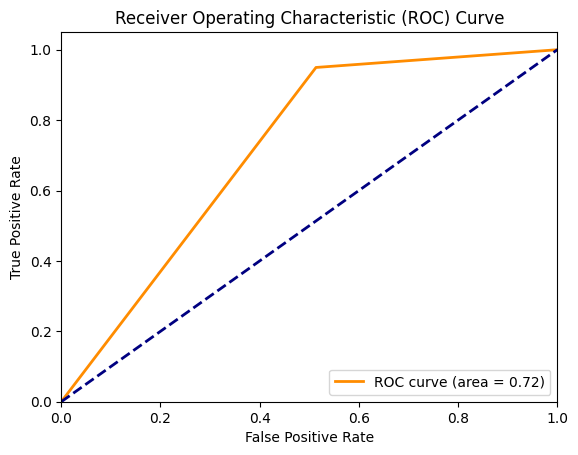

In [12]:
from sklearn.metrics import auc, RocCurveDisplay

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, train_pred)
train_roc_auc = auc(train_fpr, train_tpr)

plt.figure()
plt.plot(train_fpr, train_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {train_roc_auc_score:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [13]:
print("False Positive Rate: ", train_fpr)
print("True Positive Rate: ", train_tpr)
print("Thresholds: ", train_thresholds)
print("AUC: ", train_roc_auc)

False Positive Rate:  [0.         0.51351351 1.        ]
True Positive Rate:  [0.         0.94957983 1.        ]
Thresholds:  [inf  1.  0.]
AUC:  0.7180331592096298


* The threshold value goes from infinity to 1 to 0 which means the no positives were predicted at first, then 1 suggests correct prediction but moving to 0 suggests all the instances were predicted positive.

* The FPR value goes from 0 to 0.51 to 1 which suggests no false positives were predicted at first, the second value 0.51 suggests 51% of the negative samples were misclassified as positive and finally the 1 suggests all negatives were incorrectly classified as positives.

* The TPR value goes from 0 to 0.95 to 1 which suggests no true positives were predicted at first, the second value 0.95 suggests 95% of the positive samples were classified correctly and finally the 1 suggests all positives were correctly classified as positives.



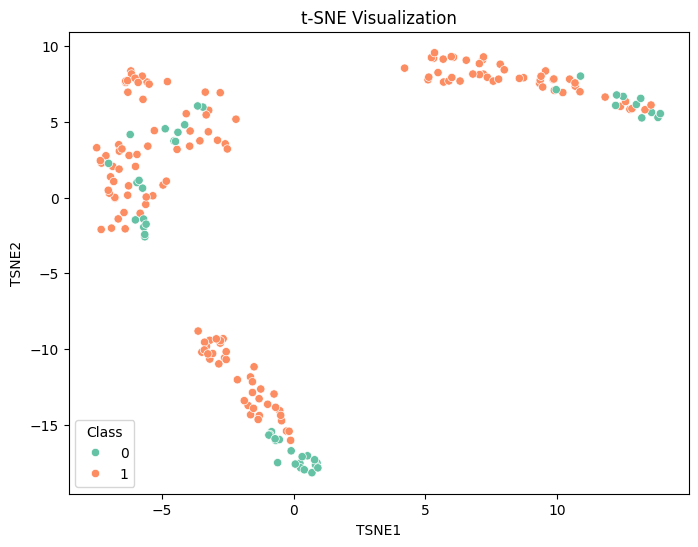

In [14]:
import seaborn as sns
from sklearn.manifold import TSNE

# Apply t-SNE to reduce the dimensions to 2
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Create a DataFrame with the t-SNE-transformed data and class labels
tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['Class'] = y.values

# Visualize the data based on class using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Class', palette='Set2')
plt.title('t-SNE Visualization')
plt.show()

## Model performance using Confusion Matrix

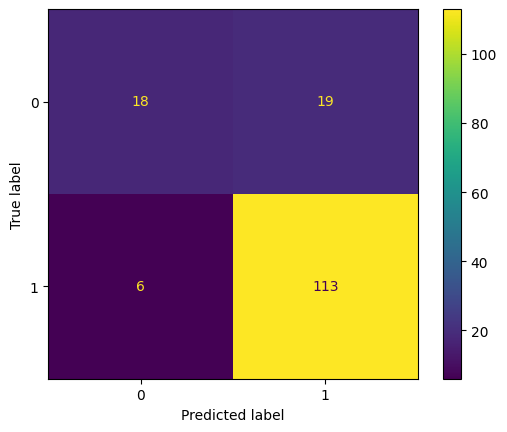

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix_va_dt = confusion_matrix(y_train, train_pred)
cm_val_dt = ConfusionMatrixDisplay(confusion_matrix_va_dt)

cm_val_dt.plot()
plt.show()


*   The confusion matrix gives us further understanding of low ROC-AUC score of 0.72. 19 of the negatives have been incorrectly classified as positive. This explains the Logistic Regression model trained, is ideal for making correct predictions for only 49% healthy people.

*   This explains the imbalance in the dataset as well with 75% records for PD patients.



## Considering all the features

In [16]:
updated_df = df.copy().drop(columns=['name', 'status'], axis=1)

In [18]:
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(updated_df,y, test_size=0.2, random_state=4)

In [19]:
lr_full = LogisticRegression()

In [20]:
lr_full.fit(X_train_full, y_train_full)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
train_pred_full = lr_full.predict(X_train_full)

In [22]:
train_acc_full = accuracy_score(y_train_full, train_pred_full)
train_precision_full = precision_score(y_train_full, train_pred_full)
train_roc_auc_score_full = roc_auc_score(y_train_full, train_pred_full)
train_recall_full = recall_score(y_train_full, train_pred_full)
train_f1_full = f1_score(y_train_full, train_pred_full)
train_roc_curve_full = roc_curve(y_train_full, train_pred_full)

In [23]:
print(f"The training data accuracy is : {np.round(train_acc_full, 2)}")
print(f"The training data precision is : {np.round(train_precision_full, 2)}")
print(f"The training data recall is : {np.round(train_recall_full, 2)}")
print(f"The training data f1-score is : {np.round(train_f1_full, 2)}")
print(f"The training data ROC curve is : {np.round(train_roc_curve_full, 2)}")
print(f"The training data ROC-AUC score is : {np.round(train_roc_auc_score_full, 2)}")

The training data accuracy is : 0.88
The training data precision is : 0.89
The training data recall is : 0.98
The training data f1-score is : 0.93
The training data ROC curve is : [[0.   0.42 1.  ]
 [0.   0.98 1.  ]
 [ inf 1.   0.  ]]
The training data ROC-AUC score is : 0.78


However, the results with the entire dataset trained using all the features is a little improved from the model trained after feature selection. Hence this was used to test the model.

In [24]:
train_fpr_full, train_tpr_full, train_thresholds_full = roc_curve(y_train_full, train_pred_full)
train_roc_auc_full = auc(train_fpr_full, train_tpr_full)

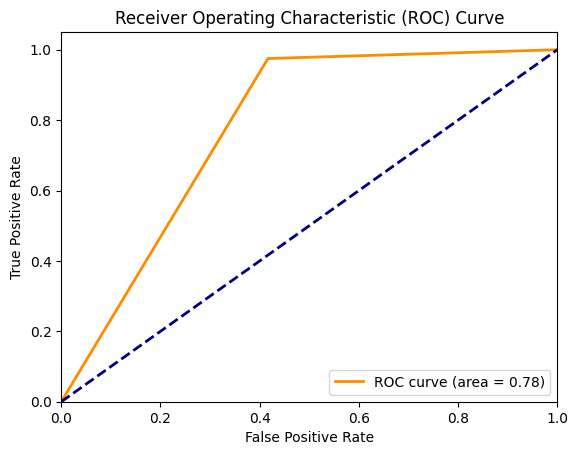

In [25]:
plt.figure()
plt.plot(train_fpr_full, train_tpr_full, color='darkorange', lw=2, label=f'ROC curve (area = {train_roc_auc_score_full:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

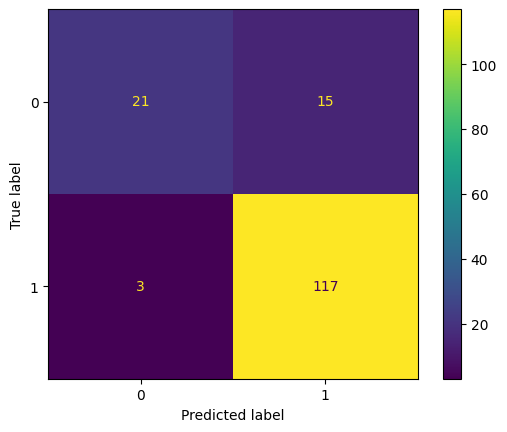

In [26]:
confusion_matrix_va_dt_full = confusion_matrix(y_train_full, train_pred_full)
cm_val_dt_full = ConfusionMatrixDisplay(confusion_matrix_va_dt_full)

cm_val_dt_full.plot()
plt.show()


*   The confusion matrix gives us further understanding of low ROC-AUC score of 0.78. 15 of the negatives have been incorrectly classified as positive. This explains the SVC model trained, is ideal for making correct predictions for only 58% healthy people.

*   This explains the imbalance in the dataset as well with 75% records for PD patients.



# Predicting test data

In [27]:
test_preds = lr_full.predict(X_test_full)

In [28]:
test_acc = accuracy_score(y_test, test_preds)
test_precision = precision_score(y_test, test_preds)
test_roc_auc_score = roc_auc_score(y_test, test_preds)
test_recall = recall_score(y_test, test_preds)
test_f1 = f1_score(y_test, test_preds)
test_roc_curve = roc_curve(y_test, test_preds)

In [29]:
print(f"The test data accuracy is : {np.round(test_acc, 2)}")
print(f"The test data precision is : {np.round(test_precision, 2)}")
print(f"The test data recall is : {np.round(test_recall, 2)}")
print(f"The test data f1-score is : {np.round(test_f1, 2)}")
print(f"The test data ROC curve is : {np.round(test_roc_curve, 2)}")
print(f"The test data ROC-AUC score is : {np.round(test_roc_auc_score, 2)}")

The test data accuracy is : 0.72
The test data precision is : 0.76
The test data recall is : 0.89
The test data f1-score is : 0.82
The test data ROC curve is : [[0.   0.73 1.  ]
 [0.   0.89 1.  ]
 [ inf 1.   0.  ]]
The test data ROC-AUC score is : 0.58


The testing data ROC-AUC score is lower 0.58 which shows the model is not ideal and is not able to differentiate in positive and negative.

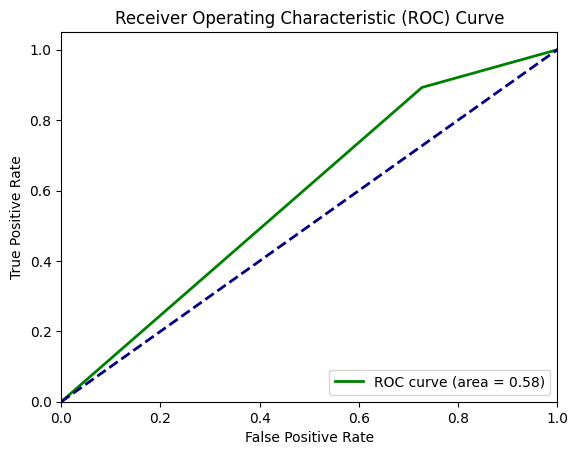

In [30]:
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_preds)
test_roc_auc = auc(test_fpr, test_tpr)

plt.figure()
plt.plot(test_fpr, test_tpr, color='green', lw=2, label=f'ROC curve (area = {test_roc_auc_score:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

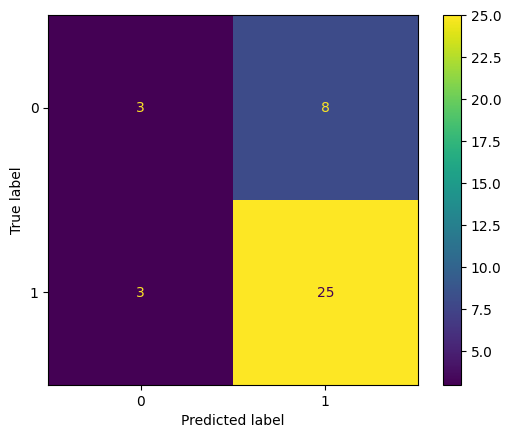

In [31]:
confusion_matrix_test_dt = confusion_matrix(y_test, test_preds)
cm_test_dt = ConfusionMatrixDisplay(confusion_matrix_test_dt)

cm_test_dt.plot()
plt.show()

Testing the trained model on the data suggests the model makes very good prediction to predict the PD patients, however, it is 28% of the healty people correctly.